In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# X = mnist.data.values
# y = mnist.target
# img_shape = (28, 28)

In [4]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
img_shape = (8, 8)

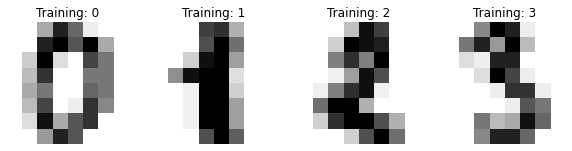

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape(img_shape), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % int(label))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2021)

### Reduce the data to 2 dimensions

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

### Fit Model

In [8]:
from unsupervised_learning.GMM import GMM

In [57]:
gmm = GMM(n_components=10, max_iterations=500)
gmm

GMM(n_components=10, max_iterations=500)

In [58]:
gmm.fit(X_train_reduced)

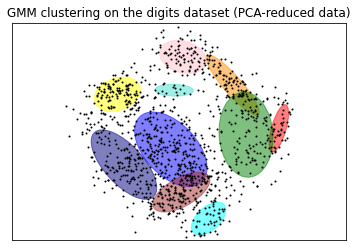

In [59]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'blue', 'yellow', 'pink', 'cyan', 'green', 'brown']

def make_ellipses(gmm, ax):

    for n in range(gmm.n_components):
        (mean, cov) = gmm._params[n]
    
        v, w = np.linalg.eigh(cov)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean[:2], v[0], v[1],
                                  180 + angle, color=colors[n])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

make_ellipses(gmm, plt.gca())

plt.plot(X_train_reduced[:, 0], X_train_reduced[:, 1], 'k.', markersize=2)
plt.title("GMM clustering on the digits dataset (PCA-reduced data)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [64]:
from sklearn.mixture import GaussianMixture
gmm2 = GaussianMixture(n_components=10, max_iter=500)
gmm2.fit(X_train_reduced)

GaussianMixture(max_iter=500, n_components=10)

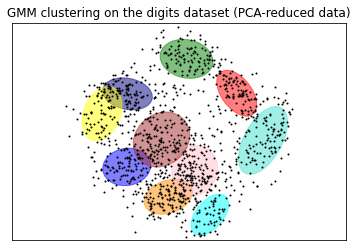

In [65]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'blue', 'yellow', 'pink', 'cyan', 'green', 'brown']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

make_ellipses(gmm2, plt.gca())

plt.plot(X_train_reduced[:, 0], X_train_reduced[:, 1], 'k.', markersize=2)
plt.title("GMM clustering on the digits dataset (PCA-reduced data)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()